In [84]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import cv2
import numpy as np
import pickle

In [76]:
digits = fetch_openml('mnist_784', version=1)
X, y = digits.data.to_numpy(), digits.target.astype(int).to_numpy()

Text(0.5, 1.0, 'digit')

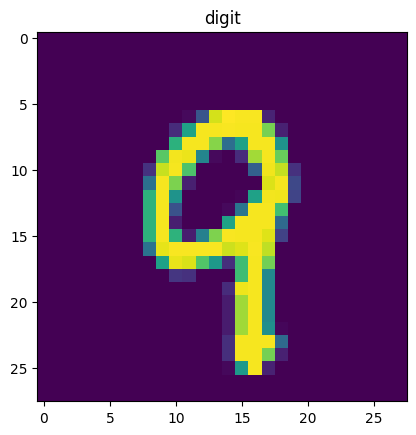

In [77]:
plt.imshow(X[350].reshape(28, 28))
plt.title('digit')

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [79]:
# scale between 0 and 1
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [80]:
# fit the model, training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [81]:
# testing
# y_pred = knn.predict(X_test_scaled)
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9722857142857143


##### Loading own image

In [88]:
# load image
img = cv2.imread("digit4.jpg", cv2.IMREAD_GRAYSCALE)
# grayscale image
img = cv2.bitwise_not(img)
# resize to 8x8
img_resized = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
# scale image using same scaler as training data
img_scaled = img_resized / 255.0

# flatten into 1D array
img_flatten = img_scaled.flatten().reshape(1, -1)

# cv2.imshow("digit",img_resized)
# cv2.waitKey(0)            
# cv2.destroyAllWindows() 

# predict
prediction = knn.predict(img_flatten)
print("Predicted Digit:", prediction[0])

Predicted Digit: 4


In [86]:
with open('knn.pkl', 'wb') as f:
    pickle.dump(knn, f)